In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
# pd.set_option('display.max_rows', None)

In [5]:
h298_df = pd.read_csv('tests/data/gdb11_0.001.csv')
h298_df.describe()

,h298
count,7116.000000
mean,-2.183370
std,60.071065
min,-262.811000
25%,-41.211000
50%,0.592500
75%,39.267750
max,191.870000


In [2]:
# specify the root directory
root_dir = 'results'

dfs = []

# iterate over the directories in the root directory
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    if os.path.isdir(subdir_path):
        
        # specify important files in the subdirectory
        json_path = os.path.join(subdir_path, "args.json")
        csv_path = os.path.join(subdir_path, "test_metrics.csv")
        
        # read in args.json
        with open(json_path, 'r') as f:
            json_data = json.load(f)
        json_df = pd.DataFrame({k:[v] for k, v in json_data.items()})
        
        # read in test_metrics.csv
        try:
            csv_df = pd.read_csv(csv_path)
        except FileNotFoundError:  # if job didn't finish, there'll be no CSV
            continue
        
        # concatentate horizontally
        df = pd.DataFrame({"directory": [subdir]})
        df = pd.concat([df, json_df, csv_df], axis=1)
        dfs.append(df)
                    
# combine the data into a single DataFrame
df = pd.concat(dfs, ignore_index=True)
df.drop(columns=['data_file', 'hf_col_name', 'lf_col_name', 'save_test_plot', 
                 'num_epochs', 'export_train_and_val', 'scale_data',
                 'split_type', 'seed'], inplace=True)
df.sort_values(by=['model_type', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf', 'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio'])

,directory,model_type,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,lf_hf_size_ratio,lf_superset_of_hf,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
177,2023-05-01_03-46-13.477609,multi_fidelity,0,0.0,0.0,0.0,1,False,24.861029,32.146980,0.700925,22.992756,28.825830,0.734866
315,2023-04-29_23-31-09.726942,multi_fidelity,0,0.0,0.0,0.0,1,True,5.621978,6.289101,0.989033,5.151890,5.849219,0.990513
577,2023-05-01_03-47-44.030651,multi_fidelity,0,0.0,0.0,0.0,10,False,9.316935,11.552845,0.959282,42.207449,52.968549,0.204968
1493,2023-04-29_23-33-59.795961,multi_fidelity,0,0.0,0.0,0.0,10,True,8.462526,9.633999,0.970657,40.536118,52.269540,0.278287
533,2023-05-01_03-49-17.453948,multi_fidelity,0,0.0,0.0,0.0,100,False,26.056055,27.461276,0.710867,47.609581,59.715291,0.010213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2023-04-30_01-49-13.649628,multi_target,3,50.0,50.0,50.0,1,True,4.491807,6.023743,0.989939,7592.299359,18801.997749,0.959871
259,2023-05-01_03-43-17.546259,multi_target,3,50.0,50.0,50.0,10,False,42.658561,51.809385,0.181104,16541.555367,37182.267051,0.822529
1348,2023-04-30_01-51-06.498254,multi_target,3,50.0,50.0,50.0,10,True,38.915787,47.659584,0.281886,17788.992864,34356.460460,0.865674
200,2023-05-01_03-44-46.330015,multi_target,3,50.0,50.0,50.0,100,False,43.941250,50.855037,0.008429,16767.083880,27926.980835,0.906805


In [3]:
df.model_type.value_counts()

model_type
multi_fidelity                   540
multi_target                     540
multi_fidelity_weight_sharing    540
single_fidelity                    1
Name: count, dtype: int64

In [6]:
df.loc[df.directory == '2023-05-01_10-30-16.444162']

,directory,model_type,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,lf_hf_size_ratio,lf_superset_of_hf,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
1590,2023-05-01_10-30-16.444162,multi_fidelity,0,0.0,0.0,0.0,100,True,23.415223,25.253001,0.854895,48.953101,61.487101,0.01789


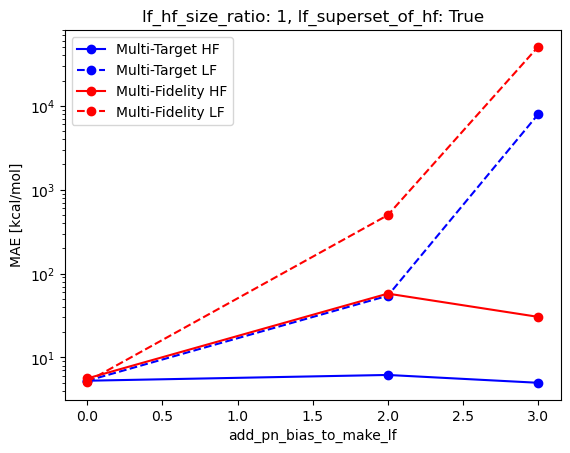

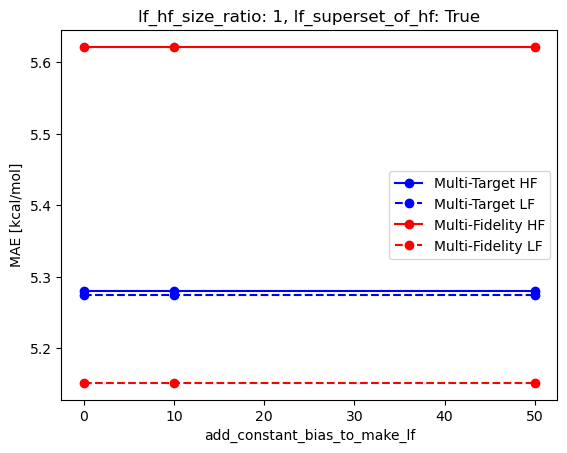

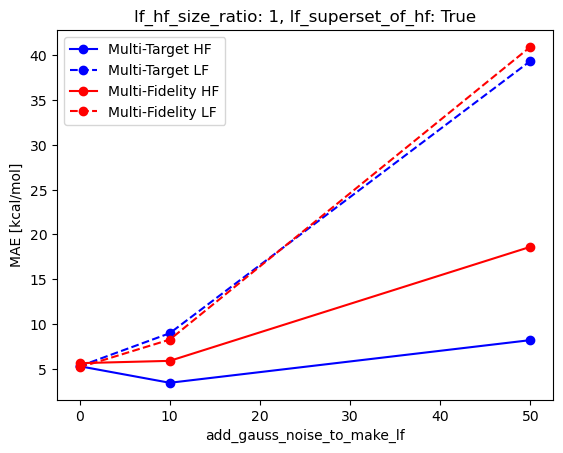

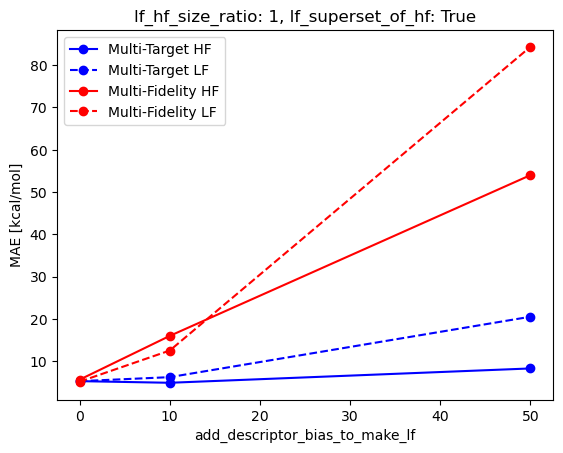

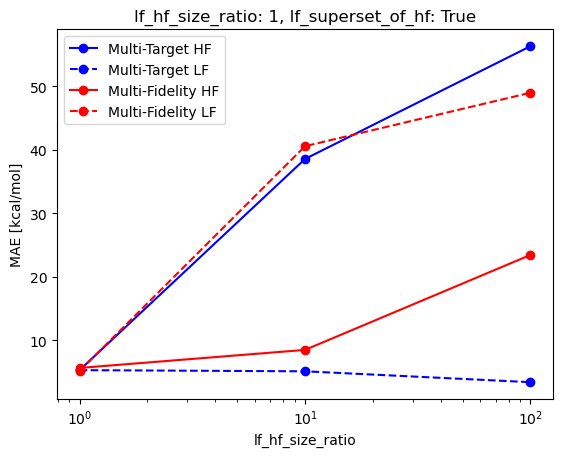

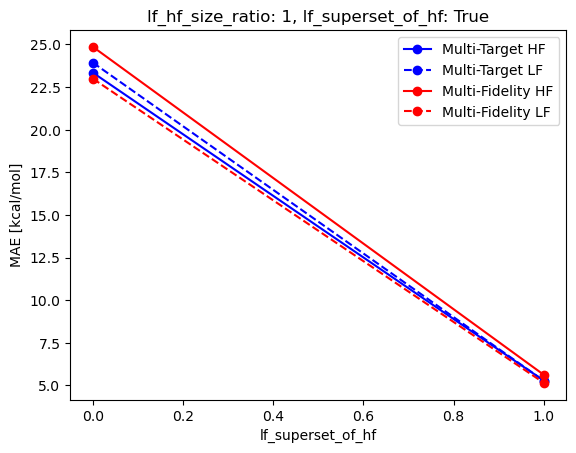

In [4]:
default_var_values = {
    'add_pn_bias_to_make_lf': 0, 
    'add_constant_bias_to_make_lf': 0.0, 
    'add_gauss_noise_to_make_lf': 0.0,	
    'add_descriptor_bias_to_make_lf': 0.0, 
    'lf_hf_size_ratio': 1,
    'lf_superset_of_hf': True,
}

models_colors_dict = {
    'single_fidelity': 'k',
    'multi_target': 'b',
    'multi_fidelity': 'r',
    'multi_fidelity_weight_sharing': 'g',
}

model_type_dict = {
    'multi_target': 'Multi-Target',
    'multi_fidelity': 'Multi-Fidelity',
    'multi_fidelity_weight_sharing': 'Multi-Fidelity WS',
}

for current_var in default_var_values.keys():
    not_current_var_default_values = {k:v for k,v in default_var_values.items() if k != current_var}

    df_ = df.loc[(df[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]

    # TODO: add lower bound baseline for single fidelity with 10% of the data at HF
    # this single fidelity isn't a great baseline because it assumes having 100% of the data at HF (this is a best case-scenario, also need lower bound)
    # plt.hlines(df_.loc[df_.model_type == 'single_fidelity'].MAE_hf, min(df_[current_var]), max(df_[current_var]), 'k', label='single_fidelity')

    for model_type in [
        'multi_target', 
        'multi_fidelity', 
        # 'multi_fidelity_weight_sharing',
    ]:
        df__ = df_.loc[df_.model_type == model_type].sort_values(by=current_var)
        plt.plot(df__[current_var], df__.MAE_hf, 'o-'+models_colors_dict[model_type], label=model_type_dict[model_type]+' HF')
        plt.plot(df__[current_var], df__.MAE_lf, 'o--'+models_colors_dict[model_type], label=model_type_dict[model_type]+' LF')

    if current_var == 'lf_hf_size_ratio':
        plt.xscale('log')

    if current_var == 'add_pn_bias_to_make_lf':
        plt.yscale('log')
    
    plt.legend()
    plt.xlabel(current_var)
    plt.ylabel('MAE [kcal/mol]')
    plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}, lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")  # TODO: remove part of title for ratio and superset plots
    # plt.legend(fontsize=14)
    # plt.xlabel('LF:HF Dataset Size Ratio', fontsize=16)
    # plt.ylabel('MAE [kcal/mol]', fontsize=16)
    # plt.xticks(fontsize=14)
    # plt.yticks(fontsize=14)
    plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.pdf")
    plt.show()